In [1]:
import os 
import sys
import glob
import time
from tqdm import tqdm

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


import MDAnalysis as mda 
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import align

In [2]:
df = pd.read_pickle('./occlusion_nsp16.pkl')
df = df.sort_values(['sys_name', 'frame']).reset_index()
df

,index,sys_name,frame,n_grids
0,0,comp_0,0,1040
1,2004,comp_0,1,1887
2,4008,comp_0,2,1205
3,6012,comp_0,3,1361
4,8016,comp_0,4,1223
...,...,...,...,...
119995,72143,nsp16_sam_2,9995,6453
119996,74147,nsp16_sam_2,9996,7569
119997,76151,nsp16_sam_2,9997,7284
119998,78155,nsp16_sam_2,9998,7111


In [3]:
df['vol'] = df['n_grids'] * 0.25**3

In [4]:
df

,index,sys_name,frame,n_grids,vol
0,0,comp_0,0,1040,16.250000
1,2004,comp_0,1,1887,29.484375
2,4008,comp_0,2,1205,18.828125
3,6012,comp_0,3,1361,21.265625
4,8016,comp_0,4,1223,19.109375
...,...,...,...,...,...
119995,72143,nsp16_sam_2,9995,6453,100.828125
119996,74147,nsp16_sam_2,9996,7569,118.265625
119997,76151,nsp16_sam_2,9997,7284,113.812500
119998,78155,nsp16_sam_2,9998,7111,111.109375


In [5]:
%run ~/.mpl_set.py

In [14]:
df.sys_name.unique()

array(['comp_0', 'comp_1', 'comp_2', 'comp_sam_0', 'comp_sam_1',
       'comp_sam_2', 'nsp16_0', 'nsp16_1', 'nsp16_2', 'nsp16_sam_0',
       'nsp16_sam_1', 'nsp16_sam_2'], dtype=object)

Text(0.5, 0, 'Occlusion Space ($\\AA^3$)')

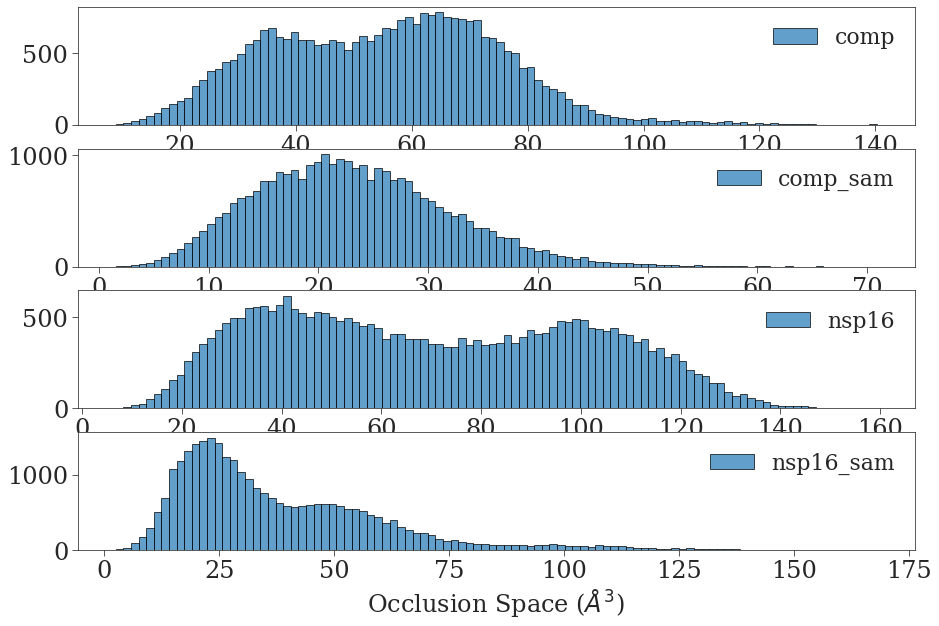

In [16]:
fig, axes = plt.subplots(4, figsize=(15,10)) 

occu_space = {}
i = 0
for sys_name in sorted(df.sys_name.unique()): 
#     sys_label = sys_name.split("_")
#     if len(sys_label) == 2:
    sys_label = sys_name[:-2]
    sub_df = df[df['sys_name'] == sys_name]
    if sys_label in occu_space: 
        occu_space[sys_label] = np.concatenate([occu_space[sys_label], sub_df.n_grids.values])
    else: 
        occu_space[sys_label] = sub_df.n_grids.values

for i, sys_name in enumerate(occu_space):     
    ax = axes[i]
    i += 1
    _ = ax.hist(occu_space[sys_name] * 0.25**3, label=sys_name, alpha=.7, bins=100) 
#             ax.text(400, 0.5, s=rmsd_col)
    ax.legend()
    
plt.xlabel(r'Occlusion Space ($\AA^3$)')

Text(0.5, 0, 'Occlusion Space ($\\AA^3$)')

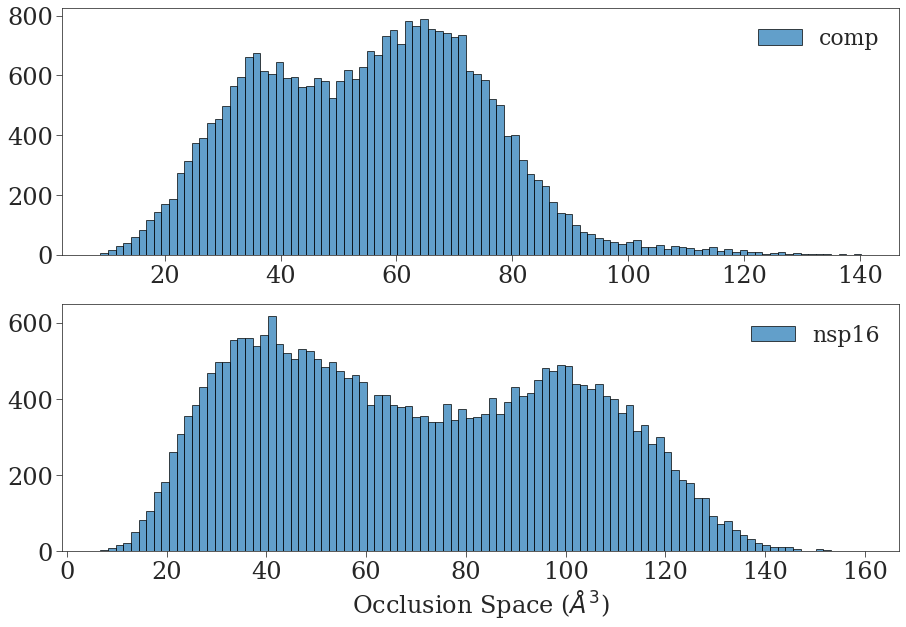

In [18]:
fig, axes = plt.subplots(2, figsize=(15,10)) 

occu_space = {}
i = 0
for sys_name in sorted(df.sys_name.unique()): 
    sys_label = sys_name.split("_")
    if len(sys_label) == 2:
        sys_label, rep = sys_label
        sub_df = df[df['sys_name'] == sys_name]
        if sys_label in occu_space: 
            occu_space[sys_label] = np.concatenate([occu_space[sys_label], sub_df.n_grids.values])
        else: 
            occu_space[sys_label] = sub_df.n_grids.values

for i, sys_name in enumerate(occu_space):     
    ax = axes[i]
    i += 1
    _ = ax.hist(occu_space[sys_name] * 0.25**3, label=sys_name, alpha=.7, bins=100) 
#             ax.text(400, 0.5, s=rmsd_col)
    ax.legend()
    
plt.xlabel(r'Occlusion Space ($\AA^3$)')

/homes/heng.ma/miniconda3/envs/MD_ff/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


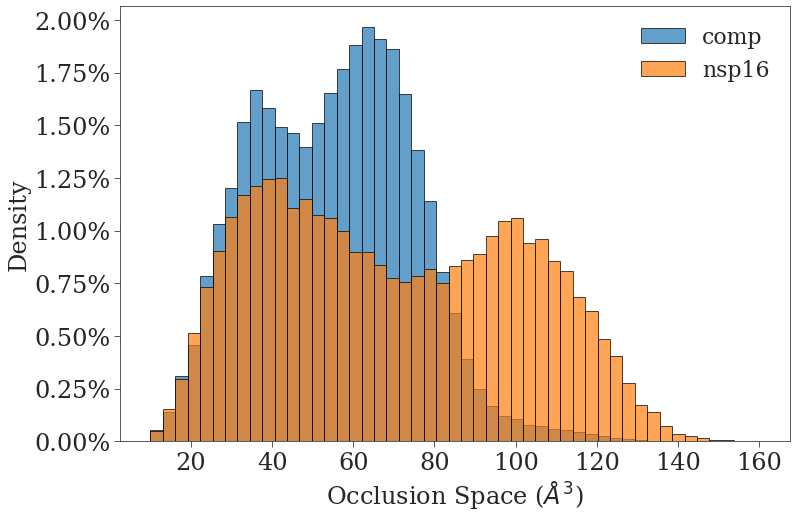

In [8]:
fig, ax = plt.subplots(1, figsize=(12,8)) 

dist = np.concatenate(np.array(list(occu_space.values())))
bins=np.histogram(dist* 0.25**3, bins=70)[1]
bins = np.linspace(10, 160, 50)

for i, sys_name in enumerate(occu_space):     
#     ax = axes[i]
    i += 1
    _ = ax.hist(occu_space[sys_name] * 0.25**3, 
                bins=bins, label=sys_name, 
                alpha=.7, 
                density=True
               ) 
#             ax.text(400, 0.5, s=rmsd_col)
    ax.legend()
    
plt.xlabel(r'Occlusion Space ($\AA^3$)')
plt.ylabel(r'Density')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig('Occlusion_space.pdf', bbox_inches='tight')
plt.savefig('Occlusion_space.png', bbox_inches='tight')

In [60]:
fig, ax = plt.subplots(1, figsize=(12,8)) 

dist = np.concatenate(np.array(list(occu_space.values())))
bins=np.histogram(dist* 0.25**3, bins=70)[1]
bins = np.linspace(10, 160, 50)

for i, sys_name in enumerate(occu_space):     
#     ax = axes[i]
    i += 1
    _ = ax.hist(occu_space[sys_name] * 0.25**3, 
                bins=bins, label=sys_name, 
                alpha=.7, 
                density=True
               ) 
#             ax.text(400, 0.5, s=rmsd_col)
    ax.legend()
    
plt.xlabel(r'Occlusion Space ($\AA^3$)')
plt.ylabel(r'Density')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
# plt.savefig('Occlusion_space.pdf', bbox_inches='tight')
# plt.savefig('Occlusion_space.png', bbox_inches='tight')

/homes/heng.ma/miniconda3/envs/MD_ff/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log



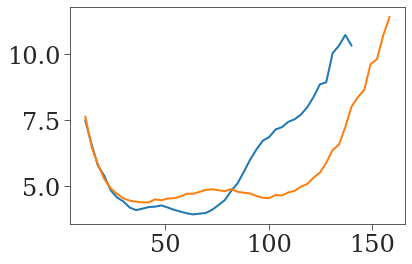

In [64]:
x = (bins[1:] + bins[:-1]) / 2
for fe in fe_profile: 
    plt.plot(x, -np.log(fe[0]))

In [62]:
fe[0]

array([5.55425904e-04, 1.39401011e-03, 3.10385064e-03, 4.56320498e-03,
       7.86308829e-03, 1.03243874e-02, 1.20124465e-02, 1.51489693e-02,
       1.66954492e-02, 1.58024115e-02, 1.48984831e-02, 1.46371062e-02,
       1.39836639e-02, 1.51271879e-02, 1.65211980e-02, 1.76647219e-02,
       1.88082458e-02, 1.96577207e-02, 1.91022948e-02, 1.86122131e-02,
       1.64994166e-02, 1.38203034e-02, 1.14134578e-02, 8.05912096e-03,
       6.06612213e-03, 3.92065344e-03, 2.46129911e-03, 1.66627771e-03,
       1.19797744e-03, 1.04550758e-03, 7.84130688e-04, 7.18786464e-04,
       5.88098016e-04, 5.33644496e-04, 4.46518864e-04, 3.37611824e-04,
       2.28704784e-04, 1.41579152e-04, 1.30688448e-04, 4.35628160e-05,
       3.26721120e-05, 2.17814080e-05, 3.26721120e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])